In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.marker as marker
import numpy as ny

ModuleNotFoundError: No module named 'matplotlib.marker'

# 1.Data Processing /Cleaning 

In [5]:
po_df = pd.read_csv(('data/po.csv'),parse_dates=['Order Date', 'Shipment Date'])

In [6]:
po_df.head()  # to see columns values with Nan or same values

,Order Date,Order ID,Website,Purchase Order Number,Shipment Date,Shipping Address City,Shipping Address State,Shipping Address Zip,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Group Name
0,2012-11-06,002-3072880-0269809,Amazon.com,NaN,2012-11-06,MALVERN,PA,19355-3222,Shipped,UPS(1ZVV65500355630089),$130.18,$0.00,$7.82,$0.00,$7.82,$138.00,NaN
1,2012-11-07,002-6376286-4641065,Amazon.com,NaN,2012-11-07,MALVERN,PA,19355-3222,Shipped,UPS(1Z602A6E0300243163),$10.99,$0.00,$0.66,$0.00,$0.66,$11.65,NaN
2,2012-11-12,103-5245236-4670652,Amazon.com,NaN,2012-11-12,MALVERN,PA,19355-3222,Shipped,UPS(1ZVV65500355884332),$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,NaN
3,2012-11-28,102-0915717-0042619,Amazon.com,NaN,2012-11-28,MALVERN,PA,19355-3237,Shipped,UPS(1Z6Y3A560310105434),$39.98,$0.00,$2.40,$0.00,$2.40,$42.38,NaN
4,2013-02-19,111-7799252-0977047,Amazon.com,NaN,2013-02-23,MALVERN,PA,19355-3241,Shipped,USPS(9361289932159103195721),$101.96,$9.68,$6.12,$9.68,$6.12,$108.08,NaN


In [7]:
po_df.shape

(301, 17)

In [8]:
po_df.columns

Index(['Order Date', 'Order ID', 'Website', 'Purchase Order Number',
       'Shipment Date', 'Shipping Address City', 'Shipping Address State',
       'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Subtotal', 'Shipping Charge',
       'Tax Before Promotions', 'Total Promotions', 'Tax Charged',
       'Total Charged', 'Group Name'],
      dtype='object')

In [9]:
po_df= po_df[['Order Date', 'Order ID', 'Carrier Name & Tracking Number', 'Order Status','Subtotal','Tax Charged',
              'Shipping Charge','Total Charged']]
po_df.head()

,Order Date,Order ID,Carrier Name & Tracking Number,Order Status,Subtotal,Tax Charged,Shipping Charge,Total Charged
0,2012-11-06,002-3072880-0269809,UPS(1ZVV65500355630089),Shipped,$130.18,$7.82,$0.00,$138.00
1,2012-11-07,002-6376286-4641065,UPS(1Z602A6E0300243163),Shipped,$10.99,$0.66,$0.00,$11.65
2,2012-11-12,103-5245236-4670652,UPS(1ZVV65500355884332),Shipped,$0.00,$0.00,$0.00,$0.00
3,2012-11-28,102-0915717-0042619,UPS(1Z6Y3A560310105434),Shipped,$39.98,$2.40,$0.00,$42.38
4,2013-02-19,111-7799252-0977047,USPS(9361289932159103195721),Shipped,$101.96,$6.12,$9.68,$108.08


In [10]:
po_df.dtypes  # prices are objects here so could be strings has to changed to floats

Order Date                        datetime64[ns]
Order ID                                  object
Carrier Name & Tracking Number            object
Order Status                              object
Subtotal                                  object
Tax Charged                               object
Shipping Charge                           object
Total Charged                             object
dtype: object

In [11]:
#to drop any column
#po_df.drop(['Website','Purchase Order Number','Group Name'], axis = 1,inplace=True)   --> with inplace can't use head

In [12]:
#drop with head()
#po_df.drop(['Website','Purchase Order Number'], axis = 1).head()


In [13]:
#Rename column Names  to remove spaces
po_df.columns = po_df.columns.str.replace(' ','') # overwrtting the columns

po_df=po_df.rename(
         columns={
                 'CarrierName&TrackingNumber':'Carrier',
            
                 
             }
         )
po_df.head()

,OrderDate,OrderID,Carrier,OrderStatus,Subtotal,TaxCharged,ShippingCharge,TotalCharged
0,2012-11-06,002-3072880-0269809,UPS(1ZVV65500355630089),Shipped,$130.18,$7.82,$0.00,$138.00
1,2012-11-07,002-6376286-4641065,UPS(1Z602A6E0300243163),Shipped,$10.99,$0.66,$0.00,$11.65
2,2012-11-12,103-5245236-4670652,UPS(1ZVV65500355884332),Shipped,$0.00,$0.00,$0.00,$0.00
3,2012-11-28,102-0915717-0042619,UPS(1Z6Y3A560310105434),Shipped,$39.98,$2.40,$0.00,$42.38
4,2013-02-19,111-7799252-0977047,USPS(9361289932159103195721),Shipped,$101.96,$6.12,$9.68,$108.08


In [14]:
po_df.shape  # after deleting it should be 14 columns

(301, 8)

In [15]:
# counting the Nan occurences
po_df.isna().sum()

OrderDate          0
OrderID            0
Carrier           15
OrderStatus        0
Subtotal           0
TaxCharged         0
ShippingCharge     0
TotalCharged       0
dtype: int64

In [16]:
# Rename the specific columns
po_df=po_df.rename(
         columns={
                
                 'CarrierName&TrackingNumber':'Carrier'
                
                 
             }
         )


In [17]:

po_df.Carrier=po_df.Carrier.str.split('(').str[0]
po_df['TotalCharged'] = po_df['TotalCharged'].str.replace('$','')
po_df.head()
#removing the tracking num from carrier
#po_df.join(po_df['Carrier'].str.split('(', 1, expand=True).rename(columns={0:'Carrier1', 1:'Tracking'})).head()

/var/folders/3c/hxpmknwd5cg9lwydrkf402qw0000gp/T/ipykernel_28103/3847874260.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  po_df['TotalCharged'] = po_df['TotalCharged'].str.replace('$','')


,OrderDate,OrderID,Carrier,OrderStatus,Subtotal,TaxCharged,ShippingCharge,TotalCharged
0,2012-11-06,002-3072880-0269809,UPS,Shipped,$130.18,$7.82,$0.00,138.00
1,2012-11-07,002-6376286-4641065,UPS,Shipped,$10.99,$0.66,$0.00,11.65
2,2012-11-12,103-5245236-4670652,UPS,Shipped,$0.00,$0.00,$0.00,0.00
3,2012-11-28,102-0915717-0042619,UPS,Shipped,$39.98,$2.40,$0.00,42.38
4,2013-02-19,111-7799252-0977047,USPS,Shipped,$101.96,$6.12,$9.68,108.08


# Transformation

In [18]:
 po_df['QUARTER'] =pd.PeriodIndex(po_df['OrderDate'], freq='Q')



In [19]:
po_df.head() # with quater column added 

,OrderDate,OrderID,Carrier,OrderStatus,Subtotal,TaxCharged,ShippingCharge,TotalCharged,QUARTER
0,2012-11-06,002-3072880-0269809,UPS,Shipped,$130.18,$7.82,$0.00,138.00,2012Q4
1,2012-11-07,002-6376286-4641065,UPS,Shipped,$10.99,$0.66,$0.00,11.65,2012Q4
2,2012-11-12,103-5245236-4670652,UPS,Shipped,$0.00,$0.00,$0.00,0.00,2012Q4
3,2012-11-28,102-0915717-0042619,UPS,Shipped,$39.98,$2.40,$0.00,42.38,2012Q4
4,2013-02-19,111-7799252-0977047,USPS,Shipped,$101.96,$6.12,$9.68,108.08,2013Q1


# 1.Exercise greather 10 

In [20]:
po_df['TotalCharged'] = po_df['TotalCharged'].astype(float)
#o=po_df.loc[po_df['TotalCharged'] > 10].count()

#print((po_df['TotalCharged'] >10).count())
df1=po_df[po_df['TotalCharged']>10]
df1.shape[0]


159

# 2.Compare before COVID 2 years and during pandamic 

In [21]:
#po_df['TotalCharged'] = po_df['TotalCharged'].str.replace('$','')
#po_df['year'] = po_df['OrderDate'].dt.year
#df2['year'] = pd. DatetimeIndex(po_df['OrderDate']). year
po_df['year'] = pd.DatetimeIndex(po_df['OrderDate']).year

In [22]:
po_df

,OrderDate,OrderID,Carrier,OrderStatus,Subtotal,TaxCharged,ShippingCharge,TotalCharged,QUARTER,year
0,2012-11-06,002-3072880-0269809,UPS,Shipped,$130.18,$7.82,$0.00,138.00,2012Q4,2012
1,2012-11-07,002-6376286-4641065,UPS,Shipped,$10.99,$0.66,$0.00,11.65,2012Q4,2012
2,2012-11-12,103-5245236-4670652,UPS,Shipped,$0.00,$0.00,$0.00,0.00,2012Q4,2012
3,2012-11-28,102-0915717-0042619,UPS,Shipped,$39.98,$2.40,$0.00,42.38,2012Q4,2012
4,2013-02-19,111-7799252-0977047,USPS,Shipped,$101.96,$6.12,$9.68,108.08,2013Q1,2013
...,...,...,...,...,...,...,...,...,...,...
296,2022-02-20,114-0488017-9568236,AMZN_US,Shipped,$32.59,$0.00,$0.00,19.55,2022Q1,2022
297,2022-02-26,113-9618918-3724230,USPS,Shipped,$5.98,$0.36,$0.00,6.34,2022Q1,2022
298,2022-03-13,114-7676118-7773048,UPS,Shipped,$2.06,$0.10,$0.00,1.64,2022Q1,2022
299,2022-04-06,112-3240198-1317033,UPS,Shipped,$14.77,$0.84,$0.00,14.87,2022Q2,2022


In [25]:
df_bc=po_df.loc[(po_df['year'] == 2019 ), 'TotalCharged'].sum()
df_bc

985.09

In [26]:

#po_df.loc[po_df['year'] == 2020, 'TotalCharged'].sum()
df_20=po_df.loc[(po_df['year'] == 2020 ), 'TotalCharged'].sum()
df_20

       
            
            

1905.5599999999997

In [27]:
df_21=po_df.loc[(po_df['year'] == 2021 ), 'TotalCharged'].sum()
df_21


2660.4700000000003

In [28]:
df_c=df_20+df_21
df_c

4566.03

In [29]:
po_df=po_df.astype({'TotalCharged':'float'})
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderDate       301 non-null    datetime64[ns]
 1   OrderID         301 non-null    object        
 2   Carrier         286 non-null    object        
 3   OrderStatus     301 non-null    object        
 4   Subtotal        301 non-null    object        
 5   TaxCharged      301 non-null    object        
 6   ShippingCharge  301 non-null    object        
 7   TotalCharged    301 non-null    float64       
 8   QUARTER         301 non-null    period[Q-DEC] 
 9   year            301 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6), period[Q-DEC](1)
memory usage: 23.6+ KB


<AxesSubplot:title={'center':'Purchase by year '}, ylabel='Frequency'>

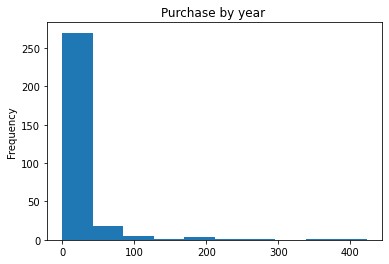

In [30]:
po_df['TotalCharged'].plot.hist(title='Purchase by year ')

Text(0, 0.5, 'TotalCharged')

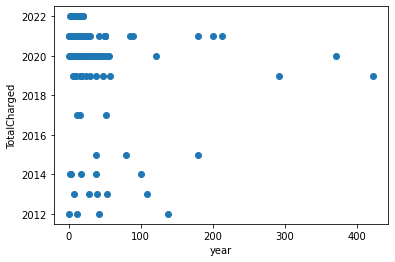

In [31]:
x=po_df['TotalCharged']
y=po_df['year']
plt.scatter(x,y)
plt.xlabel('year')
plt.ylabel('TotalCharged')

In [32]:
#Each year purchase
df_year=po_df.groupby('year').sum()
df_year=df_year.astype({'TotalCharged':'float'})
df_year


,TotalCharged
year,
2012,192.03
2013,234.44
2014,159.88
2015,296.54
2017,78.81
2019,985.09
2020,1905.56
2021,2660.47
2022,236.02


In [591]:
plt.bar(po_df.TotalCharged.unique(),df_year.size())
plt.title('Spent yearly')

TypeError: 'numpy.int64' object is not callable

TypeError: only size-1 arrays can be converted to Python scalars

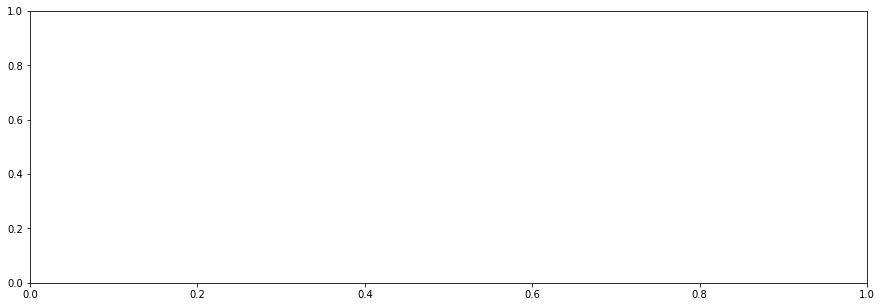

In [40]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(df_year.index, df_year.values, color = 'steelblue')
ax.set_title('Purchases by Year')

# x-axis
ax.set_xlabel('Year')
plt.xticks([x for x in df_year.index], rotation = 0)

# y-axis
ax.set_ylabel('Amount')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y,p: '$'+format(int(y), ','))
)

# labels
for i,j in zip(df_year.index, df_year.values):
    ax.annotate(format(int(j), ','), xy=(i,j), va='bottom', ha='center')

plt.show()

NameError: name 'year_df' is not defined

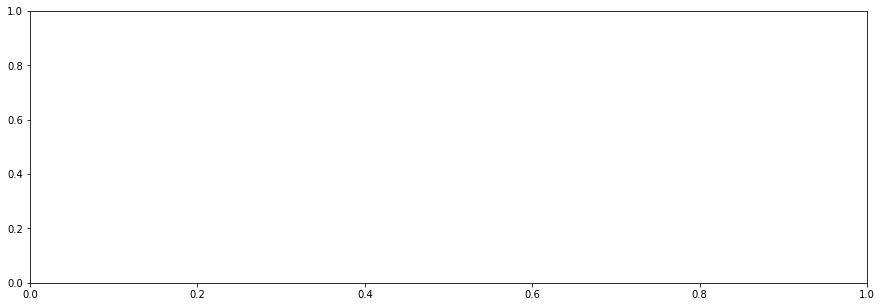

In [39]:
#plot purchase by year
fig,ax=plt.subplots(figsize=(15,5))
ax.plot(year_df.index,year_df.values,color='steelblue',marker='o')
ax.set_title('Purchase by each year')

#x-axis
ax.set_xlabel('Year')

#Y axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda y,p:format(int(y),','))
)
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

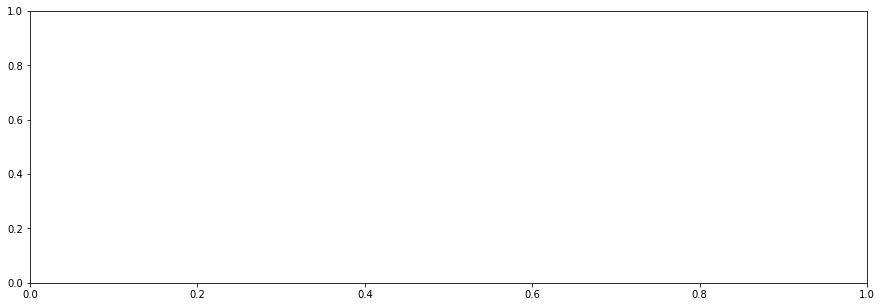

In [38]:
#plot purchase by year bar chart
fig,ax=plt.subplots(figsize=(15,5))
ax.bar(df_year.index, df_year.values, color='steelblue')
ax.set_title('Purchase by each year')

#x-axis
ax.set_xlabel('Year')
plt.xticks([x for x in year_df.index],rotation=0)

#Y axis
ax.set_ylabel('$ Amount')
ax.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda y,p: '$'+format(int(y),','))
)

#Labels
for i, j in zip(year_df.index, year_df.values):
    ax.annotate(format(int(j),','),xy=(i,j), va='bottom',ha='centre')
plt.show()